In [273]:
"""
Necessary Comment : jupyter notebook
"""

'\nNecessary Comment : jupyter notebook\n'

In [274]:
"""
Necessary Lighbary
"""
import sqlite3
import pandas as pd
import talib
import mplfinance as mpf
import numpy as np

In [275]:
"""
Database Connection
"""
connection = sqlite3.connect(r"C:/Users/user/PycharmProjects/TradingAi/cripto.db")
cur = connection.cursor()
database_data = cur.execute("select * from asset order by CloseTime").fetchall()

In [276]:
"""
Dataframe
"""
df = pd.DataFrame(database_data)
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,BTCBUSD,16635.99,16645.42,16633.84,16640.29,63.56342,0.0258475750466265,1669429979999,1659.0,27.78092,1.669430e+09
1,2,BTCBUSD,16640.55,16643.17,16633.01,16642.04,75.47950,0.00895403096653416,1669430039999,1499.0,30.66402,1.669430e+09
2,3,BTCBUSD,16641.95,16651.37,16640.23,16648.96,90.75864,0.0421224676194701,1669430099999,2025.0,50.27734,1.669430e+09
3,4,BTCBUSD,16649.40,16650.82,16639.48,16642.16,55.28349,-0.0434850505123404,1669430159999,1269.0,23.77395,1.669430e+09
4,5,BTCBUSD,16642.45,16648.66,16637.79,16645.13,66.07303,0.016103398237641,1669430219999,1566.0,35.43338,1.669430e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
1502,1503,BTCBUSD,16540.84,16543.74,16536.73,16537.67,72.12464,-0.0191646857112571,1669520039999,1562.0,35.58902,1.669520e+09
1503,1504,BTCBUSD,16537.49,16544.20,16534.45,16535.19,119.36060,-0.013907793746227,1669520099999,1705.0,53.06104,1.669520e+09
1504,1505,BTCBUSD,16534.87,16536.02,16531.28,16533.20,41.68302,-0.0100998677340569,1669520159999,884.0,21.72845,1.669520e+09
1505,1506,BTCBUSD,16533.12,16535.03,16527.40,16529.62,41.65890,-0.0211696279951999,1669520219999,1029.0,22.06537,1.669520e+09


In [277]:
"""
Name Columns
"""
df.columns = ['Id', 'Symbol', 'Open', 'High', 'Low', 'Close', 'VolumeBTC', 'Change', 'CloseTime', 'Trades', 'BuyQuoteVolume', 'Time']
# df = df.iloc[:, 2:12]
df


,Id,Symbol,Open,High,Low,Close,VolumeBTC,Change,CloseTime,Trades,BuyQuoteVolume,Time
0,1,BTCBUSD,16635.99,16645.42,16633.84,16640.29,63.56342,0.0258475750466265,1669429979999,1659.0,27.78092,1.669430e+09
1,2,BTCBUSD,16640.55,16643.17,16633.01,16642.04,75.47950,0.00895403096653416,1669430039999,1499.0,30.66402,1.669430e+09
2,3,BTCBUSD,16641.95,16651.37,16640.23,16648.96,90.75864,0.0421224676194701,1669430099999,2025.0,50.27734,1.669430e+09
3,4,BTCBUSD,16649.40,16650.82,16639.48,16642.16,55.28349,-0.0434850505123404,1669430159999,1269.0,23.77395,1.669430e+09
4,5,BTCBUSD,16642.45,16648.66,16637.79,16645.13,66.07303,0.016103398237641,1669430219999,1566.0,35.43338,1.669430e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
1502,1503,BTCBUSD,16540.84,16543.74,16536.73,16537.67,72.12464,-0.0191646857112571,1669520039999,1562.0,35.58902,1.669520e+09
1503,1504,BTCBUSD,16537.49,16544.20,16534.45,16535.19,119.36060,-0.013907793746227,1669520099999,1705.0,53.06104,1.669520e+09
1504,1505,BTCBUSD,16534.87,16536.02,16531.28,16533.20,41.68302,-0.0100998677340569,1669520159999,884.0,21.72845,1.669520e+09
1505,1506,BTCBUSD,16533.12,16535.03,16527.40,16529.62,41.65890,-0.0211696279951999,1669520219999,1029.0,22.06537,1.669520e+09


In [278]:
"""
Candle Data Column
"""
df_candle = df[['CloseTime', 'Open', 'High', 'Low', 'Close', 'VolumeBTC']]
df_candle

,CloseTime,Open,High,Low,Close,VolumeBTC
0,1669429979999,16635.99,16645.42,16633.84,16640.29,63.56342
1,1669430039999,16640.55,16643.17,16633.01,16642.04,75.47950
2,1669430099999,16641.95,16651.37,16640.23,16648.96,90.75864
3,1669430159999,16649.40,16650.82,16639.48,16642.16,55.28349
4,1669430219999,16642.45,16648.66,16637.79,16645.13,66.07303
...,...,...,...,...,...,...
1502,1669520039999,16540.84,16543.74,16536.73,16537.67,72.12464
1503,1669520099999,16537.49,16544.20,16534.45,16535.19,119.36060
1504,1669520159999,16534.87,16536.02,16531.28,16533.20,41.68302
1505,1669520219999,16533.12,16535.03,16527.40,16529.62,41.65890


In [279]:
"""
Time Indexing
"""
df_candle = df.set_index('CloseTime')
df_candle.index = pd.to_datetime(df.index, unit='ms')

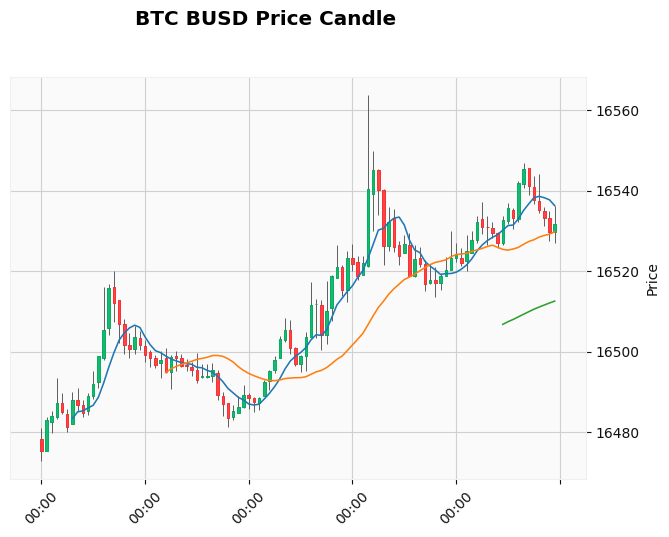

In [280]:
mpf.plot(
    df_candle.tail(100),
#     df,
    mav=[7, 25 , 90],
    type="candle",
#     type="renko",
    title=f"BTC BUSD Price Candle",
    style="yahoo",
)

In [281]:
df = df.set_index('CloseTime')
df.index = pd.to_datetime(df.index, unit='ms')
df = df.tail(100)
df

,Id,Symbol,Open,High,Low,Close,VolumeBTC,Change,Trades,BuyQuoteVolume,Time
CloseTime,,,,,,,,,,,
2022-11-27 01:59:59.999,1408,BTCBUSD,16478.26,16481.10,16472.88,16475.31,34.46343,-0.0179023756148834,1101.0,14.20299,1.669514e+09
2022-11-27 02:00:59.999,1409,BTCBUSD,16475.31,16483.72,16475.31,16483.16,55.86779,0.0476470548960751,1568.0,32.07491,1.669514e+09
2022-11-27 02:01:59.999,1410,BTCBUSD,16482.54,16485.41,16479.79,16483.98,79.09843,0.00873651755129179,1396.0,51.29875,1.669514e+09
2022-11-27 02:02:59.999,1411,BTCBUSD,16483.79,16493.40,16483.30,16487.40,74.84790,0.021900303267638,1601.0,35.84621,1.669515e+09
2022-11-27 02:03:59.999,1412,BTCBUSD,16487.33,16489.85,16484.53,16484.99,34.68218,-0.014192716467737,844.0,11.35596,1.669515e+09
...,...,...,...,...,...,...,...,...,...,...,...
2022-11-27 03:33:59.999,1503,BTCBUSD,16540.84,16543.74,16536.73,16537.67,72.12464,-0.0191646857112571,1562.0,35.58902,1.669520e+09
2022-11-27 03:34:59.999,1504,BTCBUSD,16537.49,16544.20,16534.45,16535.19,119.36060,-0.013907793746227,1705.0,53.06104,1.669520e+09
2022-11-27 03:35:59.999,1505,BTCBUSD,16534.87,16536.02,16531.28,16533.20,41.68302,-0.0100998677340569,884.0,21.72845,1.669520e+09


In [282]:
# Find Candle Pattern
ENGULFING = talib.CDLENGULFING(df['Open'], df['High'], df['Low'],
                                         df['Close'])
ENGULFING[ENGULFING != 0]

CloseTime
2022-11-27 02:23:59.999   -100
2022-11-27 02:57:59.999    100
2022-11-27 03:06:59.999   -100
2022-11-27 03:15:59.999    100
2022-11-27 03:27:59.999    100
2022-11-27 03:30:59.999    100
2022-11-27 03:32:59.999   -100
dtype: int32

In [283]:
bullish_engulfing = (ENGULFING.replace([-100, 0], np.nan)/100) *(df.Low-2)
bearsh_engulfing = (-ENGULFING.replace([100, 0], np.nan)/100) *(df.High *1.0001)

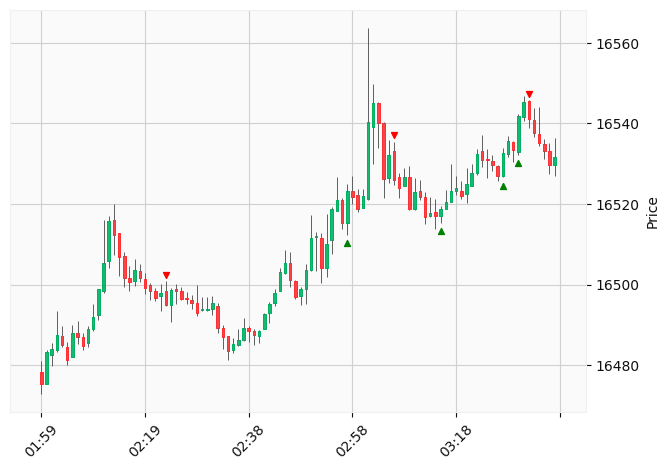

In [284]:
addplot = [mpf.make_addplot(bullish_engulfing, type='scatter', color='g', marker = "^"), mpf.make_addplot(bearsh_engulfing, type='scatter', color='r', marker = "v")]
mpf.plot(df, addplot = addplot, type="candle",style="yahoo")

In [116]:
"""
Necessary Columns
"""
df['HAMMER'] = talib.CDLHAMMER(df['Open'], df['High'], df['Low'], df['Close'])
df['MA7'] = talib.MA(df['Close'], timeperiod=int(7), matype=0)
df['MA25'] = talib.MA(df['Close'], timeperiod=int(25), matype=0)
df['MA90'] = talib.MA(df['Close'], timeperiod=int(90), matype=0)
df['MA200'] = talib.MA(df['Close'], timeperiod=int(200), matype=0)
df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='ms')
df['MA7=MA25'] = abs(df['MA7'] - df['MA25']) <= 0.5
df['MA25=MA90'] = abs(df['MA25'] - df['MA90']) <= 0.5
df['MA90=MA7'] = abs(df['MA90'] - df['MA7']) <= 0.5
# df = df.iloc[:, 6:]
df = df[['CloseTime', 'Trades', 'HAMMER','MA7','MA25','MA90', 'MA7=MA25', 'MA25=MA90', 'MA90=MA7']]

KeyError: 'CloseTime'

In [ ]:
"""
X value for DecisionTreeClassifier
"""
X = df.drop(columns=['Open', 'High', 'Low', 'Close', 'VolumeBTC', 'Change', 'CloseTime', 'BuyQuoteVolume', 'Time'])
X

In [ ]:
"""
y value for DecisionTreeClassifier
"""
# Find Candle Pattern
HAMMER = talib.CDLHAMMER(df['Open'], df['High'], df['Low'],
                                         df['Close'])
HAMMER

In [ ]:
"""
Model for AI Research
"""
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model

In [ ]:
model.fit(X, y)

In [ ]:
# model.predict([  [40, 0],[60, 1] ])